In [112]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import math

# ESERCIZIO 0

#### Punto 1


Se X può assumere soltanto i valori {0,1} che rappresentano rispettivamente insuccesso e successo possiamo dire che segue una distribuzione Bernoulliana e quindi $X\sim B(p)$

#### Punto 2


Essendo una bernoulliana sappiamo che 
$$ Var(X) = p(1-p)$$
quindi
$$ \sigma = \sqrt{p(1-p)}$$

#### Punto 3


Eseguendo $k$ esperimenti indipendenti stiamo costruendo una nuova V.A $Y$ che presenta una distribuzione Binomiale e quindi
$$ Y \sim B(k,p)$$
Vogliamo quindi ora calcolare $\mathbb{P}(X=n) = {k \choose n} \cdot (1-p)^{k-n}$

#### Punto 4

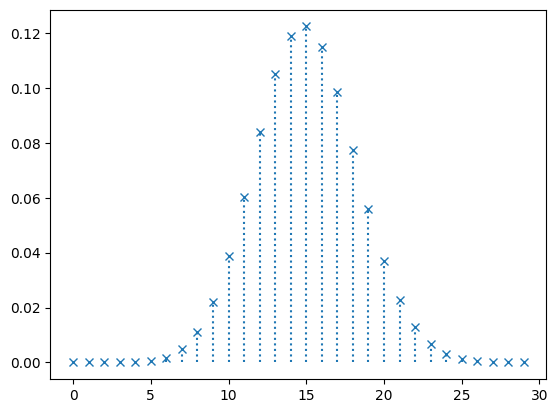

In [15]:
k=50
p=0.3
dist=st.binom(k,p)
x=np.arange(0,30,1)
plt.vlines(x,0,dist.pmf(x), linestyle='dotted')
plt.plot(x,dist.pmf(x),'x')
plt.show()

#### Punto 5

Definizione da appunti

#### Punto 6


Considerando che $X$ è una Bernoulliana e quindi il $\mathbb{E}(X)=p$, a noi basta trovare uno stimatore non distorto per il valore atteso per stimare $p$

Nel nostro caso quindi $T_n=\overline{X}$

#### Punto 7

Teorema limite centrale e taglia minima del campione

# ESERCIZIO 1

In [16]:
df=pd.read_csv('finanziamenti.csv',sep=';',decimal=',')
df

,id,TemaPrioritario,FONTE,CodiceCategoria,CATEGORIA,UNITA,FinProvincia,FinRegione,TotSpese
0,4,5,Compet. per le imprese,18,TECNOLOGIE INFORMATICHE,ASSISI,22356.25,22356.25,83037.5
1,38,5,Compet. per le imprese,40,OPERE E INFRASTRUTTURE PER LA RICERCA,ASSISI,99750.00,99750.00,370500.0
2,39,11,Agenda digitale,40,OPERE E INFRASTRUTTURE PER LA RICERCA,ASSISI,3802.90,3802.90,18423.2
3,43,4,Ricerca e innovazione,18,TECNOLOGIE INFORMATICHE,ASSISI,193020.00,193020.00,474360.0
4,73,6,Ricerca e innovazione,39,"OPERE, IMPIANTI ED ATTREZZATURE PER ATTIVITA' ...",ASSISI,10688.70,10688.70,NaN
...,...,...,...,...,...,...,...,...,...
3663,3306,43,Energia e efficienza energetica,8,SOCIALI E SCOLASTICHE,UMBERTIDE,116836.55,116836.55,NaN
3664,3313,61,Rinnovamento urbano e rurale,6,PRODUZIONE DI ENERGIA,UMBERTIDE,89297.33,89297.33,NaN
3665,3314,61,Rinnovamento urbano e rurale,99,ALTRE INFRASTRUTTURE SOCIALI,UMBERTIDE,125582.65,125582.66,NaN
3666,3507,61,Rinnovamento urbano e rurale,12,"SPORT, SPETTACOLO E TEMPO LIBERO",UMBERTIDE,512767.96,512767.95,NaN


#### Punto 1

CodiceCategoria rappresenta un carattere scalare in quanto numerico e non qualitativo

#### Punto 2

In [22]:
ct=pd.crosstab(index=df['UNITA'],columns=['FA'],normalize=False)
ct

col_0,FA
UNITA,
ASSISI,243
CASCIA,13
CASTIGLIONE DEL L,75
CHIUSI,30
CITTA DI CASTELLO,288
CORTONA,1
FOLIGNO,449
GUALDO TADINO,75
GUBBIO,76


#### Punto 3

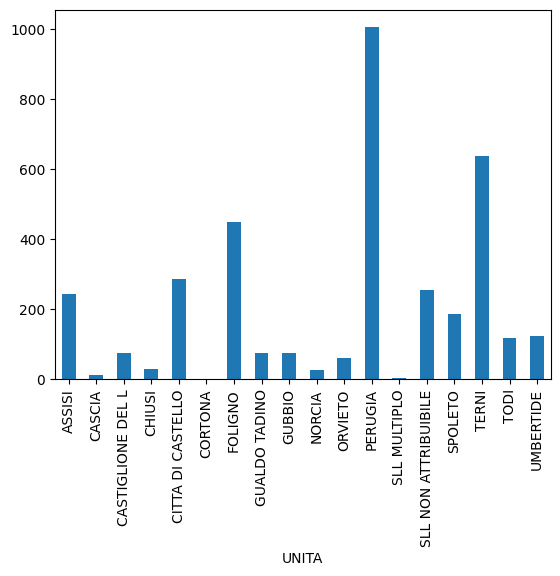

In [23]:
ct.plot.bar(legend=False)
plt.show()

#### Punto 4

#### Punto 5

In [26]:
progetti_a = df[df['FinProvincia']<df['FinRegione']]
progetti_a

,id,TemaPrioritario,FONTE,CodiceCategoria,CATEGORIA,UNITA,FinProvincia,FinRegione,TotSpese
7,163,6,Ricerca e innovazione,41,OPERE E STRUTTURE PER IL TURISMO,ASSISI,5898.48,7793.44,25427.84
104,1350,6,Ricerca e innovazione,12,RIASSETTO E RECUPERO DI SITI URBANI E PRODUTTIVI,ASSISI,6599.01,6599.02,NaN
105,1364,6,Ricerca e innovazione,12,RIASSETTO E RECUPERO DI SITI URBANI E PRODUTTIVI,ASSISI,68317.25,90265.04,NaN
108,1444,51,Ambiente e prevenzione dei rischi,11,"PROTEZIONE, VALORIZZAZIONE E FRUIZIONE DELL'AM...",ASSISI,95633.71,95633.72,NaN
124,1719,6,Ricerca e innovazione,12,RIASSETTO E RECUPERO DI SITI URBANI E PRODUTTIVI,ASSISI,8803.09,11631.19,24975.22
...,...,...,...,...,...,...,...,...,...
3618,1986,61,Rinnovamento urbano e rurale,8,SOCIALI E SCOLASTICHE,UMBERTIDE,76494.50,76494.51,NaN
3620,2030,40,Energia e efficienza energetica,6,PRODUZIONE DI ENERGIA,UMBERTIDE,17588.08,23238.48,NaN
3652,3022,61,Rinnovamento urbano e rurale,42,STRUTTURE ED ATTREZZATURE PER IL COMMERCIO E I...,UMBERTIDE,311.58,311.59,NaN
3659,3243,7,Ricerca e innovazione,62,PROGETTI DI RICERCA E DI INNOVAZIONE PRESSO I...,UMBERTIDE,44329.32,58570.68,191100.00


In [28]:
progetti_b = df[df['FinProvincia']>=df['FinRegione']]
progetti_b

,id,TemaPrioritario,FONTE,CodiceCategoria,CATEGORIA,UNITA,FinProvincia,FinRegione,TotSpese
0,4,5,Compet. per le imprese,18,TECNOLOGIE INFORMATICHE,ASSISI,22356.25,22356.25,83037.5
1,38,5,Compet. per le imprese,40,OPERE E INFRASTRUTTURE PER LA RICERCA,ASSISI,99750.00,99750.00,370500.0
2,39,11,Agenda digitale,40,OPERE E INFRASTRUTTURE PER LA RICERCA,ASSISI,3802.90,3802.90,18423.2
3,43,4,Ricerca e innovazione,18,TECNOLOGIE INFORMATICHE,ASSISI,193020.00,193020.00,474360.0
4,73,6,Ricerca e innovazione,39,"OPERE, IMPIANTI ED ATTREZZATURE PER ATTIVITA' ...",ASSISI,10688.70,10688.70,NaN
...,...,...,...,...,...,...,...,...,...
3662,3305,43,Energia e efficienza energetica,8,SOCIALI E SCOLASTICHE,UMBERTIDE,146083.41,146083.41,NaN
3663,3306,43,Energia e efficienza energetica,8,SOCIALI E SCOLASTICHE,UMBERTIDE,116836.55,116836.55,NaN
3664,3313,61,Rinnovamento urbano e rurale,6,PRODUZIONE DI ENERGIA,UMBERTIDE,89297.33,89297.33,NaN
3666,3507,61,Rinnovamento urbano e rurale,12,"SPORT, SPETTACOLO E TEMPO LIBERO",UMBERTIDE,512767.96,512767.95,NaN


In [30]:
print("Progetti di tipo A sono: "+str(len(progetti_a)))
print("Progetti di tipo B sono: "+str(len(progetti_b)))

Progetti di tipo A sono: 368
Progetti di tipo B sono: 3284


In [39]:
selezione_progetti_a=progetti_a[(progetti_a['FinProvincia'] >200)&(progetti_a['FinProvincia'] <1000)]
selezione_progetti_a

,id,TemaPrioritario,FONTE,CodiceCategoria,CATEGORIA,UNITA,FinProvincia,FinRegione,TotSpese
601,3198,61,Rinnovamento urbano e rurale,42,STRUTTURE ED ATTREZZATURE PER IL COMMERCIO E I...,CITTA DI CASTELLO,819.98,819.99,3826.61
602,3199,61,Rinnovamento urbano e rurale,42,STRUTTURE ED ATTREZZATURE PER IL COMMERCIO E I...,CITTA DI CASTELLO,945.71,945.72,4413.35
610,3215,61,Rinnovamento urbano e rurale,42,STRUTTURE ED ATTREZZATURE PER IL COMMERCIO E I...,CITTA DI CASTELLO,753.66,753.67,3517.09
615,3224,61,Rinnovamento urbano e rurale,42,STRUTTURE ED ATTREZZATURE PER IL COMMERCIO E I...,CITTA DI CASTELLO,883.79,883.80,4124.39
796,1173,5,Compet. per le imprese,40,OPERE E INFRASTRUTTURE PER LA RICERCA,FOLIGNO,861.60,1138.40,2000.00
1060,3454,61,Rinnovamento urbano e rurale,42,STRUTTURE ED ATTREZZATURE PER IL COMMERCIO E I...,FOLIGNO,879.49,879.50,NaN
1993,2155,61,Rinnovamento urbano e rurale,42,STRUTTURE ED ATTREZZATURE PER IL COMMERCIO E I...,PERUGIA,995.74,995.75,4646.81
2491,1989,86,Rafforzamento capacitÃ della PA,41,SERVIZI DI ASSISTENZA TECNICA ALLA P.A.,SLL NON ATTRIBUIBILE,361.17,361.18,NaN
2492,1990,86,Rafforzamento capacitÃ della PA,41,SERVIZI DI ASSISTENZA TECNICA ALLA P.A.,SLL NON ATTRIBUIBILE,270.99,271.00,NaN
2519,2230,86,Rafforzamento capacitÃ della PA,41,SERVIZI DI ASSISTENZA TECNICA ALLA P.A.,SLL NON ATTRIBUIBILE,432.10,432.11,NaN


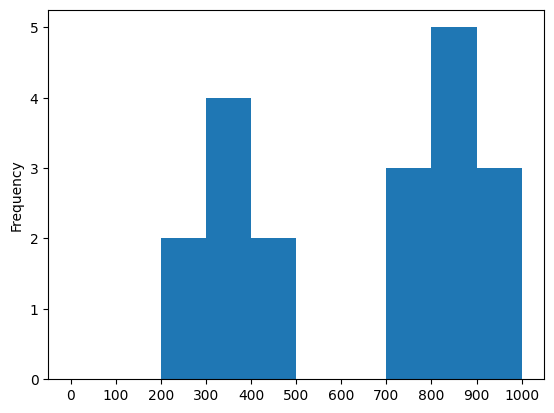

In [77]:
fin_provincia=selezione_progetti_a['FinProvincia']
x=np.arange(0,1001,100)
fin_provincia.plot.hist(bins=x)
plt.xticks(x)
plt.show()

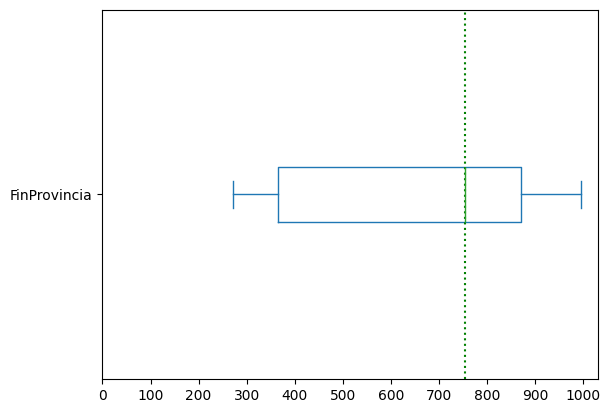

In [66]:
fin_provincia.plot.box(vert=False)
plt.xticks(x)
plt.axvline(fin_provincia.median(),linestyle='dotted',color='green')
plt.show()

In [79]:
fin_provincia.mean()

636.9052631578948

In [80]:
fin_provincia.std()

264.80233322588253

In [84]:
fin_range=fin_provincia=selezione_progetti_a[(selezione_progetti_a['FinProvincia']>500) & (selezione_progetti_a['FinProvincia']<700)]
len(fin_range)

0

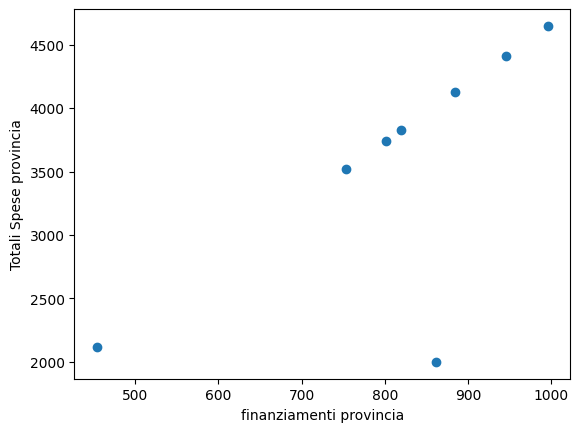

In [98]:
fin_provincia=selezione_progetti_a['FinProvincia']
spese_provincia=selezione_progetti_a['TotSpese']
plt.scatter(fin_provincia,spese_provincia)
plt.xlabel("finanziamenti provincia")
plt.ylabel("Totali Spese provincia")
plt.show()

In [97]:
fin_provincia.corr(spese_provincia)

0.6964011723762348

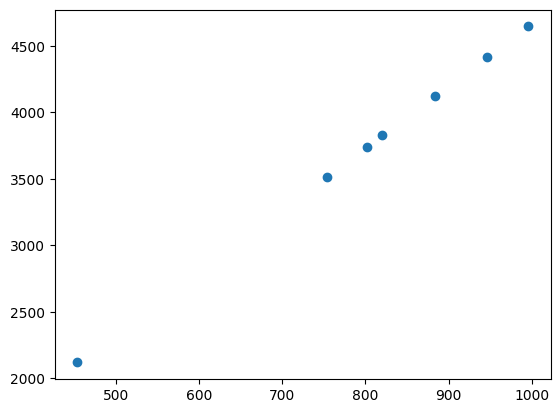

In [107]:
progetti_ol=selezione_progetti_a[selezione_progetti_a['TotSpese']>2000]
finanziamenti=progetti_ol['FinProvincia']
spese=progetti_ol['TotSpese']
plt.scatter(finanziamenti,spese)
plt.show()

In [108]:
finanziamenti.corr(spese)

0.9999999999078262

# ESERCIZIO 2

In [109]:
df

,id,TemaPrioritario,FONTE,CodiceCategoria,CATEGORIA,UNITA,FinProvincia,FinRegione,TotSpese
0,4,5,Compet. per le imprese,18,TECNOLOGIE INFORMATICHE,ASSISI,22356.25,22356.25,83037.5
1,38,5,Compet. per le imprese,40,OPERE E INFRASTRUTTURE PER LA RICERCA,ASSISI,99750.00,99750.00,370500.0
2,39,11,Agenda digitale,40,OPERE E INFRASTRUTTURE PER LA RICERCA,ASSISI,3802.90,3802.90,18423.2
3,43,4,Ricerca e innovazione,18,TECNOLOGIE INFORMATICHE,ASSISI,193020.00,193020.00,474360.0
4,73,6,Ricerca e innovazione,39,"OPERE, IMPIANTI ED ATTREZZATURE PER ATTIVITA' ...",ASSISI,10688.70,10688.70,NaN
...,...,...,...,...,...,...,...,...,...
3663,3306,43,Energia e efficienza energetica,8,SOCIALI E SCOLASTICHE,UMBERTIDE,116836.55,116836.55,NaN
3664,3313,61,Rinnovamento urbano e rurale,6,PRODUZIONE DI ENERGIA,UMBERTIDE,89297.33,89297.33,NaN
3665,3314,61,Rinnovamento urbano e rurale,99,ALTRE INFRASTRUTTURE SOCIALI,UMBERTIDE,125582.65,125582.66,NaN
3666,3507,61,Rinnovamento urbano e rurale,12,"SPORT, SPETTACOLO E TEMPO LIBERO",UMBERTIDE,512767.96,512767.95,NaN


In [115]:
no_spese=df[df['TotSpese'].isna()]
len(no_spese)

1134